<h1 style="text-align:center">Mega Project 3</h1>

<h2>Abstract</h2>

The focus of this project is on Nonnegative Matrix Factorization(NMF), and its various applications including clustering and community detection. NMF is a type of matrix factorization which works on nonnegative matrices and decomposes them into the product of two factors with nonnegative constraints in the form of A=WH. It does so by solving an optimization problem and minimizing the norm of error between the original matrix and the decomposed product,that is ||A-WH||2. There are many algorithms for solving the problem, like Alternative Least Squares(ALS), Multiplicative Update Rules, and gradient descent. Each one has its own pros and cons.


In phase 1, we will implement the NMF algorithm based on Gradient Descent(GD) and compare the results with sklearn's default package implementation. Our implementation will take maximum iterations and learning rate as input paramters, which are changable based on the answer obtained. 


Phase 2 is about the application of NMF in clustering. As we know, the matrices obtained with the decomposition can be used for clustering. W shows the cluster centers and H is composed of coefficients for each data point in the clustering. As an example, we shall combine topic modelling from NLP with our task and understand topics from a number of documents by using clustering. Therefore, we can use NMF to do the clustering and give the topics. For implementation purposes, the sklearn algorithm will be used in this phase as it gives faster results.


In phase 3, we will define a community detection problem on Zachary’s karate club Graph dataset from the networkx package, and try to detect the communities using NMF. Our implemented GD based algorithm will be used in this section, and different results will be tested against each other using various hyper parameter values. The parameters will be analyzed based on the results. 


<h2>Phase 1</h2>

Before we start with the algorithms, let's import all the necessary packages:

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

Now that we have every package loaded and ready, let's get straight to our NMF implementation based on the GD method.

The algorithm is defined in the following class(SGD_NMF) with two functions. The init function initializes the class parameters based on values given by the user. The paramters are as follows: n_components which specifies the number of components of the W matrix (the number of basis column vectors), the learning_rate defines the rate of convergence or learning for the GD method, and the max_iter is the maximum number of times the algorithm is allowed to be repeated to converge and give the final results. The parameters have default values in case the user misses out one. 

The second function fits the NMF algorithm on a matrix given by the user and applies the GD method on it. The method's pseudo-code is given below:

<img src="Algorithm.PNG">

The matrix operations in the above picture are equivalant to the component-wise operations below:

<img src="Algorithm2.PNG">

The fit function does what the above algorithm describes. The first two lines initialize the W and H matrixes by random values. Then, in the for loop, we take the gradient of W and H and update the previous values obtained using W=W-lr * grad_W and H=H-lr * grad_H. We then calculate the loss by comparing the original matrix with the obtained components, and repeat the process again. The for loop stops when we reach the maximum number of iterations. If, for any reason, the algorithm fails to converge or an error occurs, we raise an exception and throw an error. 


That's all there is to this class.

In [2]:
class SGD_NMF:
    def __init__(self, n_components=2, learning_rate=0.01, max_iter=50):
        self.n_components=n_components
        self.learning_rate=learning_rate
        self.max_iter=max_iter        
        self.cost=[]

    def fit(self, A):
      try:
        W=np.random.rand(A.shape[0],self.n_components)*0.01
        H=np.random.rand(self.n_components, A.shape[1])*0.01        
        for _ in range(self.max_iter):
            grad_W = W@H@H.T - A@H.T
            grad_H = W.T@W@H - W.T@A
            #update W, H
            W = W - self.learning_rate * grad_W
            H = H - self.learning_rate * grad_H            
            self.cost.append(np.abs(A-W@H).sum())        
        self.W=W
        self.H=H
        return self.W, self.H
      except Exception as e:
        print("Exception \"{0}\" occured ",e)

Let's try the implementation and compare it with sklearn on a given random square 3x3 matrix A:

In [28]:
np.random.seed(28)
A = np.random.rand(3,3)   
print(A)

[[0.72901374 0.5612396  0.12496709]
 [0.39759237 0.78130821 0.51099298]
 [0.18269336 0.85351288 0.95537189]]


We define an NMF model using sklearn first, initialize the components randomly, have 300 maximum iterations and a learning rate of 0.01, with 2 components, and fit it on A. W and H are given below:

In [29]:
skNMF = NMF(n_components=2, init='random', random_state=28, max_iter=300, alpha=0.01)
W1 = skNMF.fit_transform(A)
H1 = skNMF.components_ 
print("W1:")
print(W1)
print("H1:")
print(H1)

W1:
[[0.86914665 0.03852837]
 [0.52193712 0.55376805]
 [0.2077856  1.01465835]]
H1:
[[0.81322082 0.63272267 0.08772041]
 [0.         0.72929176 0.89812209]]


Let's see the results using our algorithm now:

In [30]:
myNMF = SGD_NMF(n_components=2, learning_rate=0.01, max_iter=300)
W2,H2 = myNMF.fit(A)
print("W2:")
print(W2)
print("H2:")
print(H2)

W2:
[[0.38601743 0.32238194]
 [0.47814625 0.4470561 ]
 [0.55157483 0.56456115]]
H2:
[[0.34577909 0.60073936 0.44869447]
 [0.28282948 0.5720361  0.46395657]]


By simply glancing at the components, we might not get a clear vision of the differences. Thus, the difference between A and W1H1, and W2H2 (the norm error loss) is computed and the results are summarized in the following table:

In [6]:
pt = PrettyTable(["","GradientDescent NMF","Sklearn's NMF"])
pt.add_row(["Distance between A and W*H", np.abs(A-W2@H2).sum(), np.abs(A-W1@H1).sum()])
pt.add_row(["n_iter", 300, 300])
pt.add_row(["learning_rate", 0.01, 0.01])
print(pt)

+----------------------------+---------------------+---------------------+
|                            | GradientDescent NMF |    Sklearn's NMF    |
+----------------------------+---------------------+---------------------+
| Distance between A and W*H |  2.0931522441644654 | 0.21683945106964508 |
|           n_iter           |         300         |         300         |
|       learning_rate        |         0.01        |         0.01        |
+----------------------------+---------------------+---------------------+


As seen above, the maximum number of iterations and learning rate is equal for both algorithms. The sklearn algorithm gave slightly better results, with the loss value of 0.21, while our implementation had a 2.09 loss. While this may seem critical, it isn't when the dimensions of the matrix increases and it becomes non-square. Therefore, our algorithm had an overall desirable performance.

As the implementation is based on GD, the convergence can be visualized simply:

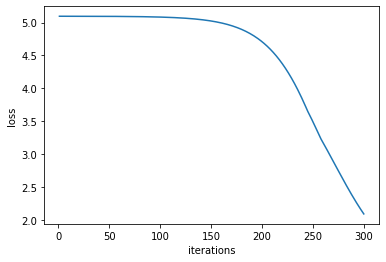

In [7]:
plt.plot(range(1,myNMF.max_iter+1), myNMF.cost)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

The plot shows that as the number of iterations emerged 150, the algorithm started to converge and the loss started to decrease. by 300 iterations, it successfully converged and the loss stood around 2. So, with parameters equal to those given to sklearn, our algorithm had an acceptable performance, accuracy, and convergance speed. 

<h2>Phase 2</h2>

This phase is about performing clustering with NMF. As stated above, we will use sklearn's algorithm in this section to get accurate results. When we decompose a matrix into W and H, The W basis vectors represent clusters discovered from the original data. The H values can be considered as coefficients which show membership weights for every data point belonging to each of the clusters. So, to perform clustering with NMF, all we have to do is decompose the original data matrix A=WH, then for each data point aj=Whj (where j represents a column), all we have to do is look at the hij value in H. aj is assigned to cluster i if hij has the maximum value in column j of H. 

To mix things up, we shall perform clustering with this technique in a topic modelling problem to determine topics from documents. Topic modelling is an unsupervised problem used in NLP where given several text documents, clustering is performed on them to discover a summarized overall topic based on the contents of the documents. 

So what roll does NMF play in topic modelling? In this problem, the original matrix to perform NMF on is simply a term-document matrix constructed from the topics, which shows the number of times each word appeared in a document. Assuming we've performed NMF on the matrix, the W basis vector component shows the topics (clusters) discovered from the document matrix, and H shows the coefficients, that is, the membership weights for the topics in each document.

With the introduction above, the 20 newsgroups dataset from sklearn is picked for topic modelling. The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics, so it is easy to understand and perfect for clustering and topic modelling. 

The data is loaded below, the headers, footers, and quotes are removed, it is shuffled randomly, and we store the data in the documents variable:

In [8]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

We already know that there are 20 topics present. We would like to see 10 top words from every topic, to visually represent each topic and make it understandable. Next, we convert the document matrix to term-document matrix by using the tfidf vectorizer from sklearn. The bag of words technique is used by extracting 1000 top features from the document matrix by the tfidf transformer, and then the tfidf vectorizer is applied on that. The feature names are also stored to be used later.

In [9]:
no_features = 1000
no_topics = 20
no_top_words = 10

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

Now that we have our term-document matrix, we perform NMF on it:

In [10]:
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

Next we need a function to somehow display the clusters (topics) and actually do the clustering. The following function takes the decomposed components, the feature names, and the number of top words as input, the for each of the 20 topics (clusters) it determines 10 of its top members by looking at their membership weight in the coefficient matrix, just like we described above for clustering. It then prints the top 10 members for each topic.

In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" %(topic_idx)) 
        print( " ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

Let's see the result of our clustering with NMF by printing the topics:

In [12]:
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
people time right did good said say make way government
Topic 1:
window problem using server application screen display motif manager running
Topic 2:
god jesus bible christ faith believe christian christians sin church
Topic 3:
game team year games season players play hockey win league
Topic 4:
new 00 sale 10 price offer shipping condition 20 15
Topic 5:
thanks mail advance hi looking info help information address appreciated
Topic 6:
windows file files dos program version ftp ms directory running
Topic 7:
edu soon cs university ftp internet article email pub david
Topic 8:
key chip clipper encryption keys escrow government public algorithm nsa
Topic 9:
drive scsi drives hard disk ide floppy controller cd mac
Topic 10:
just ll thought tell oh little fine work wanted mean
Topic 11:
does know anybody mean work say doesn help exist program
Topic 12:
card video monitor cards drivers bus vga driver color memory
Topic 13:
like sounds looks look bike sound lot things really thing
To

Topics 0 and 8 don't appear to show anything in particular, but the other clusters are easy to interpret. For example, based on top words from topic number 2 appears to be about religion and christianity. The 20newsgroups dataset has labels for each topic, so with a quick check we see that most topics are indeed correctly detected from their respective documents.

In conclusion, topic modeeling can be easily performed using clustering, and NMF clsustering is very efficient and suitable for the task, and gives quick reliable clusters compared with other typical clustering algorithms like K-means, which may suffer from local answers.

<h2>Phase 3</h2>

In our final phase, NMF and clustering will be used to solve a community detection problem and detect communities from a given graph. Let's define communities first. In graphs, a community is defined as a subset of nodes densely connected to each other which are loosely connected to nodes in other communities present in the graph. Community detection is exactly that, identifying communities in a given graph.

From our point of view, the task is similar to clustering, where points in a given cluster are close to each other, and far from other points in other clusters. So, we can turn the community detection problem to a cluster detection one, and use NMF with clustering on a network graph to extract its clusters (communities).

Detecting communities in a network is important in network analysis. In reality, there are huge networks out there like social media networks, with millions of nodes and connections. Detecting communities in such graphs are difficult, so we will use a sample graph from the networkx package to ease our task. Zachary's karate club graph is used to perform community detection with NMF. It's a social network of a university karate club, published by Michelle Girvan and Mark Newman. 

The network shows 34 nodes representing the members of a karate club, with links between pairs who interacted outside the club. A conflict arose between administrator "John A" and instructor "Mr. Hi", as a result of which the club split into two communities formed around each of those two people by taking sides. Therefore, the true number of clusters shall be 2.

Let's load the graph and visualize it from the networkx package:

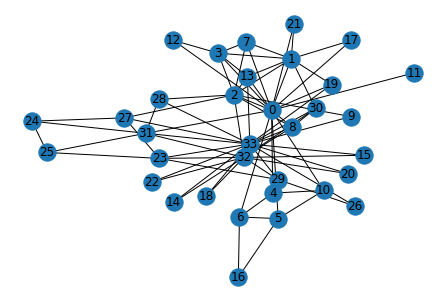

In [13]:
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)

As seen below, there are 34 nodes and 78 edges(connections):

In [14]:
print(len(G.nodes))
print(len(G.edges))

34
78


In order to perform NMF on the graph, we need to convert it to a numpy adjacency matrix first, where a 0 element represents no edges present between two nodes, and a 1 element shows an edge present:

In [15]:
R = nx.to_numpy_array(G)
print(R)
print(R.shape)

[[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
(34, 34)


The true community members are known for the network, as seen in the picture:

<img src="community.PNG">

Therefore we can visualize the two clusters by making two lists, checking the node values from the lists and plotting them from the original graph in two different colors:

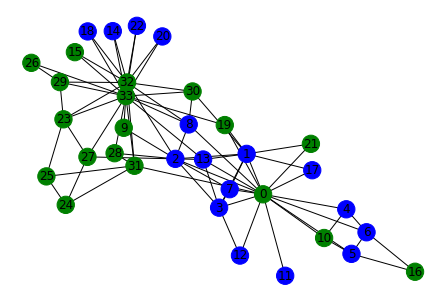

In [16]:
true_cluster0=[1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22]
true_cluster1=[0,9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33]

color_map = []
for node in G:
    if node in true_cluster0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show() 

The two communities are shown in green and blue, with their respective labels.

The rest of this phase is simple, we build and fit 8 NMF models on the adjacency matrix R, using our GD based NMF algorithm and performing clustering with the technique described in phase 2. models 1 to 4 have 300 maximum iterations, but their learning rates vary from 0.001 to 1. Models 5 to 8 have a learning rate of 0.1, but maximum iterations of 100,30,1000, and 5. 

After fitting the models, performing clustering, and visualizing the communities, we will do a sensitivity analysis on the hyper parameters and determine the best ones by looking at the clustering results.

Model 1 results:

In [17]:
model1 = SGD_NMF(n_components=2, learning_rate=0.01, max_iter=300)
w1,h1 = myNMF.fit(R)

In [18]:
clus0 = []
clus1 = []

for i in range(0,34):
  if(h1[:,i][0]> h1[:,i][1]): clus0.append(i)
  else: clus1.append(i)

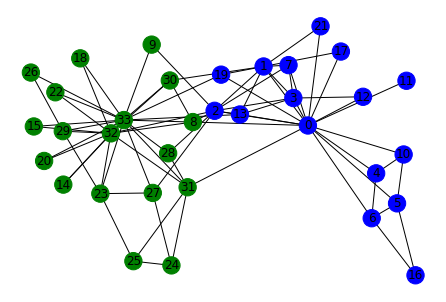

In [19]:
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

Model 2 results:

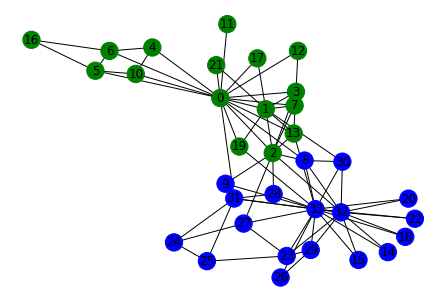

In [20]:
model2 = SGD_NMF(n_components=2, learning_rate=0.1, max_iter=300)
w2,h2 = myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h2[:,i][0]> h2[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()    

Model 3 results:

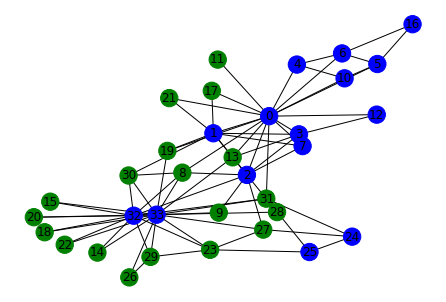

In [21]:
model3 = SGD_NMF(n_components=2, learning_rate=1, max_iter=300)
w3,h3= myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h3[:,i][0]> h3[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show() 

Model 4 results:

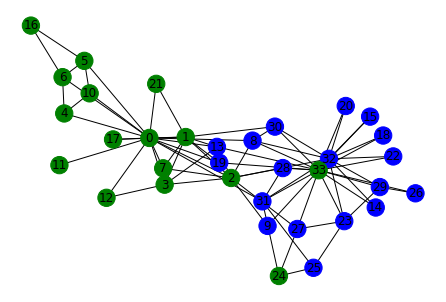

In [22]:
model4 = SGD_NMF(n_components=2, learning_rate=0.001, max_iter=300)
w4,h4= myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h4[:,i][0]> h4[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show() 

Model 5 results:

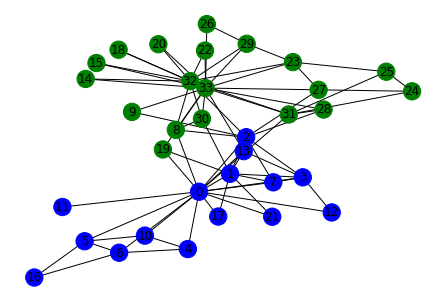

In [24]:
model5 = SGD_NMF(n_components=2, learning_rate=0.1, max_iter=100)
w5,h5 = myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h5[:,i][0]> h5[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()  

Model 6 results:

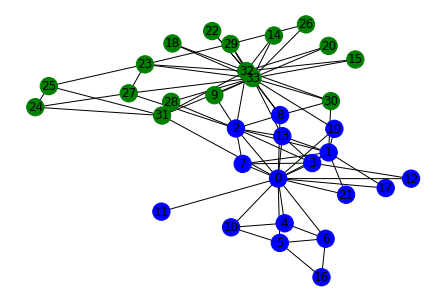

In [25]:
model6 = SGD_NMF(n_components=2, learning_rate=0.1, max_iter=30)
w6,h6 = myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h6[:,i][0]> h6[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()  

Model 7 results:

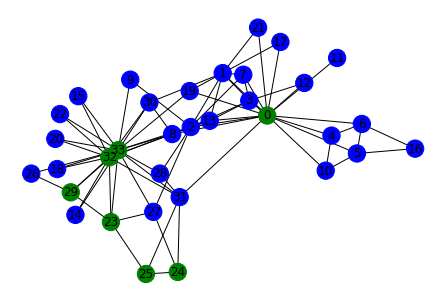

In [26]:
model7 = SGD_NMF(n_components=2, learning_rate=0.1, max_iter=1000)
w7,h7 = myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h7[:,i][0]> h7[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show() 

Model 8 results:

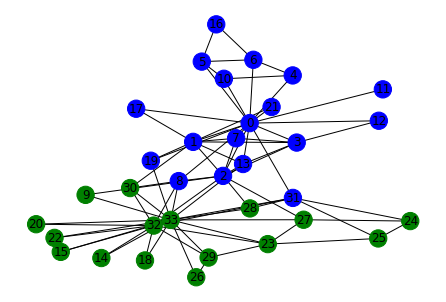

In [27]:
model8 = SGD_NMF(n_components=2, learning_rate=0.1, max_iter=5)
w8,h8 = myNMF.fit(R)

clus0 = []
clus1 = []

for i in range(0,34):
  if(h8[:,i][0]> h8[:,i][1]): clus0.append(i)
  else: clus1.append(i)
    
color_map = []
for node in G:
    if node in clus0:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show() 

As stated above, models 1 to 4 showcases different values of learning rates. Models 1 and 2 had the least errors, with 10 and 9 incorrect members respectively. Models 3 and 4 performed poorly, with 15 and 12 errors. Thus, when the learning rate is 0.1 we have the best performance, and when learning rate increase or decreases, the model doesn't perform well. It appears that increasing the learning rate to 1 has a worse effect on the clustering.

In terms of maximum iterations, model 5 and 6 both gave 9 errors, and there doesn't seem to be much difference between 100 and 30 iterations. Model 8 had 10 errors, which is slightly worse. Model 7 had too many errors, and almost clustered all points to a single community, giving the worst performance. In conclusion, when we have 5 iterations, the convergence doesnt happen yet, and 30 iterations is perfect for converging with minium amount of errors. Increasing the iterations to 100 doesnt have that much effect, but taking it to 1000 absolutely ruins everything. So, decreasing the number of iterations doesnt have much effect, and we still get good clusters, but increasing the iterations over a certain number leads to incorrect clustering, and the model views all points as similar to each other.

<h2>Recources</h2>

1. Eldén, Lars. Matrix methods in data mining and pattern recognition. Society for Industrial and Applied Mathematics, 2007.
2. https://github.com/saikarthikcheedella/NMF-using-GradientDescent-from-scratch/blob/master/NMF_using_GD.ipynb
3. https://medium.com/ml2vec/topic-modeling-is-an-unsupervised-learning-approach-to-clustering-documents-to-discover-topics-fdfbf30e27df
4. https://scikit-learn.org/0.15/datasets/twenty_newsgroups.html
5. https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
6. https://www.analyticsvidhya.com/blog/2020/04/community-detection-graphs-networks/
7. https://www.researchgate.net/figure/True-communities-of-Zacharys-karate-club-network_fig1_325719324
8. https://en.wikipedia.org/wiki/Zachary%27s_karate_club